In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**QUESTION 1**

$$
\tan \left( \frac{\pi x}{2} \right) = \frac{4 x}{\pi} \sum_{k=1}^{\infty} \frac{1}{(2k - 1)^2 -x^2}
$$

```
\tan \left( \frac{\pi x}{2} \right) = \frac{4 x}{\pi} \sum_{k=1}^{\infty} \frac{1}{(2k - 1)^2 -x^2}
```

In [2]:
def k_sum(x,N):
    if x >= 1 and x <= 2*N-1 and (x-1) % 2 == 0:
        print('Error: x cannot be an odd integer in the interval [1,2N-1]')
        return None
    else:
        k = np.arange(1,N+1)
        return 4*x/np.pi * np.sum(1/((2*k - 1)**2 - x**2))

In [3]:
k_sum(3,10)

Error: x cannot be an odd integer in the interval [1,2N-1]


In [4]:
k_sum(1/2,1000)

0.99984084506685555

In [5]:
k_sum(2/3,1000)

1.7318386009879119

In [6]:
np.sqrt(3)

1.7320508075688772

**QUESTION 2**

$$
\frac{2}{\pi} = \sqrt{ \frac{1}{2} } \cdot \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}}  \cdot \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}} } \ \cdots
$$

```
\frac{2}{\pi} = \sqrt{ \frac{1}{2} } \cdot \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}} 
\cdot \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{ \frac{1}{2} + \frac{1}{2} \sqrt{\frac{1}{2}}} } \ \cdots
```

In [7]:
def a_product(d,N):
    a = [np.sqrt(d)]
    for n in range(1,N+1):
        a.append(np.sqrt(d + d*a[n-1]))
    return np.array(a).prod()

In [8]:
a_product(1/2,100)

0.63661977236758116

In [9]:
2/np.pi

0.6366197723675814

**QUESTION 3**

In [10]:
def b_product(b):
    k = np.arange(1,len(b)+1)
    return np.prod(1 + b**2/k)

In [11]:
b_product(np.ones(3))

4.0

In [12]:
(1+1)*(1+1/2)*(1+1/3)

4.0

**QUESTION 4**

In [13]:
def sum_plot(alpha,N,a,b):
    x = np.linspace(a,b,(b - a)*200)
    y = sum([(-1)**k * np.cos(2*np.pi*k*x)/(k**2 + alpha**2) for k in range(1,N+1)])
    plt.plot(x,y), plt.xlim([a,b])

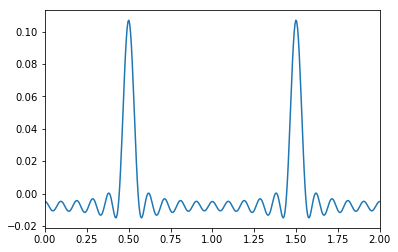

In [14]:
sum_plot(8,10,0,2)

**QUESTION 5**

In [15]:
def c_sequence(a,b):
    c = []
    for n in range(0,len(a)):
        c.append(sum([a[k]*b[n - k] for k in range(0,n+1)]))
    return c

In [16]:
c_sequence(np.ones(10),np.ones(10))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

**QUESTION 6**

In [17]:
def parametric_plots(a,k):
    t = np.linspace(0,2*np.pi,200)
    N = len(a)
    plt.figure(figsize=(16,max(1,15//N)))
    for n in range(0,N):
        plt.subplot(1,N,n+1)
        x = 2*k[n]*np.cos(t) - a[n]*np.cos(k[n]*t)
        y = 2*k[n]*np.sin(t) - a[n]*np.sin(k[n]*t)
        plt.plot(x,y), plt.title('(a,k)=({0},{1})'.format(a[n],k[n])), plt.axis('equal'), plt.axis('off')

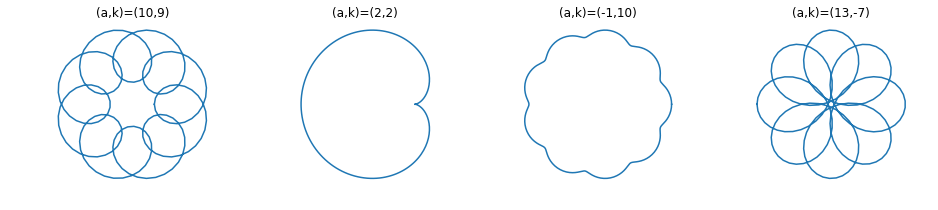

In [18]:
parametric_plots([10,2,-1,13],[9,2,10,-7])

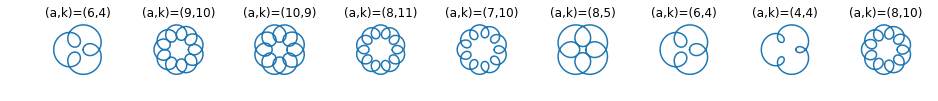

In [19]:
a = np.random.randint(2,13,9)
k = np.random.randint(2,13,9)
parametric_plots(a,k)

**QUESTION 7**

In [20]:
def is_prime(n):
    if n < 2:
        return False
    else:
        for d in range(2,round(n**0.5)+1):
            if n % d == 0:
                return False
        return True

In [21]:
def f_plot(N):
    primes = [n for n in range(2,N+1) if is_prime(n)]
    y = [1]
    for n in range(2,N+1):
        divisors = [d for d in range(2,n+1) if n % d == 0]
        prime_divisors = [d for d in divisors if d in primes]
        prime_divisors = np.array(prime_divisors)
        fn = n * np.prod(1 - 1/prime_divisors)
        y.append(fn)
    x = np.arange(1,N+1)
    plt.figure(figsize=(12,5))
    plt.scatter(x,y,s=2), plt.xlim([0,N])
    return y

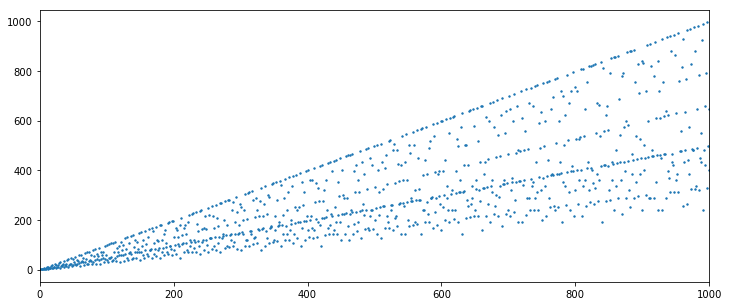

In [22]:
f_plot(1000);

**QUESTION 8**

In [23]:
def quad_reps(a,b,c,n):
    params = [a,b,c,n]
    if min(params) < 0:
        print('Input parameters must be positive integers.')
        return None
    if max([p % 1 for p in params]) > 0:
        print('Input parameters must be positive integers.')
        return None        
    
    reps = []
    X = round((n/max([a,1]))**0.5) + 1
    Y = round((n/max([c,1]))**0.5) + 1
    for x in range(0,X):
        for y in range(0,Y):
            if a*x**2 + b*x*y + c*y**2 == n:
                reps.append((x,y))
    return reps

In [24]:
quad_reps(3,2,2,378)

[(4, 11), (6, 9), (10, 3)]

In [25]:
quad_reps(4,3,1,242)

[(1, 14), (7, 2)]

In [26]:
quad_reps(1,1,1.1,1)

Input parameters must be positive integers.
